In [1]:
import pandas as pd


file_path = '../dataset/ESSAI2/160/Valeurs de la piste DB2D.txt'


df_dynamic = pd.read_csv(file_path, delimiter='\t', header=None, engine='python')

# Check the number of columns detected
df_dynamic_columns = df_dynamic.shape[1]

df_dynamic.head(), df_dynamic_columns

(                   0         1    2     3    4    5    6    7      8    \
 0  26/01/2005 17:49:45   300.641    0  1542    1   15    1    1  160.0   
 1  26/01/2005 17:54:45   600.656    0  2777    1   15    1    1  160.0   
 2  26/01/2005 17:59:46   901.156    0  4014    1   15    1    1  160.0   
 3  26/01/2005 18:04:46  1201.391    0  5249    1   15    1    1  160.0   
 4  26/01/2005 18:09:46  1502.000    0  6489    1   15    1    1  160.0   
 
         9    ...       130       131       132       133       134       135  \
 0  4.116579  ...  0.003562  0.003582  0.003492  0.003582  0.003542  0.003542   
 1  4.116579  ...  0.003582  0.003522  0.003562  0.003562  0.003542  0.003592   
 2  4.116579  ...  0.003542  0.003582  0.003562  0.003522  0.003582  0.003542   
 3  4.116579  ...  0.003592  0.003552  0.003582  0.003552  0.003542  0.003592   
 4  4.116579  ...  0.003572  0.003532  0.003602  0.003542  0.003572  0.003592   
 
         136       137       138  139  
 0  0.003572  0.0035

In [2]:
import os
import pandas as pd

source_dir = "../dataset"
essai_folders = ["ESSAI2", "ESSAI3", "ESSAI6", "ESSAI7"]
files_to_process = ["Valeurs de la piste DB2D.txt", "Valeurs de la piste DB2G.txt"]
output_file_path = "../dataset/combined_valeurs.txt"

df_list = []

for essai_folder in essai_folders:
    essai_path = os.path.join(source_dir, essai_folder)

    if os.path.exists(essai_path):
        for subfolder in os.listdir(essai_path):
            subfolder_path = os.path.join(essai_path, subfolder)

            if os.path.isdir(subfolder_path):
                for file_name in files_to_process:
                    file_path = os.path.join(subfolder_path, file_name)

                    if os.path.exists(file_path):
                        try:
                            # Read the file
                            df = pd.read_csv(file_path, delimiter='\t', header=None, engine='python')
                            
                            # Add Experiment number
                            experiment_number = int(essai_folder.replace("ESSAI", ""))
                            df['experiment_number'] = experiment_number
                            
                            # Add Left/Right based on file name
                            if "DB2D" in file_name:
                                df['position'] = 'Right'
                            elif "DB2G" in file_name:
                                df['position'] = 'Left'
                            
                            df_list.append(df)

                            print(f"Successfully read {file_name} from {subfolder_path}")

                        except Exception as e:
                            print(f"Failed to read {file_name} from {subfolder_path}. Error: {e}")
                    else:
                        print(f"File {file_name} not found in {subfolder_path}")

if df_list:
    # Combine all dataframes
    combined_df = pd.concat(df_list, ignore_index=True)
    
    # Rename specific columns
    combined_df.rename(columns={0: 'Date', 1: 'Period', 3: 'Cycle_Number', 8: 'velocity'}, inplace=True)
    
    # Save the combined dataframe
    combined_df.to_csv(output_file_path, sep='\t', header=False, index=False)

    print(f"Combined data saved to {output_file_path}")
else:
    print("No data to combine.")


Successfully read Valeurs de la piste DB2D.txt from ../dataset\ESSAI2\160
Successfully read Valeurs de la piste DB2G.txt from ../dataset\ESSAI2\160
Successfully read Valeurs de la piste DB2D.txt from ../dataset\ESSAI2\210
Successfully read Valeurs de la piste DB2G.txt from ../dataset\ESSAI2\210
Successfully read Valeurs de la piste DB2D.txt from ../dataset\ESSAI2\270
Successfully read Valeurs de la piste DB2G.txt from ../dataset\ESSAI2\270
Successfully read Valeurs de la piste DB2D.txt from ../dataset\ESSAI2\320
Successfully read Valeurs de la piste DB2G.txt from ../dataset\ESSAI2\320
Successfully read Valeurs de la piste DB2D.txt from ../dataset\ESSAI2\360
Successfully read Valeurs de la piste DB2G.txt from ../dataset\ESSAI2\360
Successfully read Valeurs de la piste DB2D.txt from ../dataset\ESSAI2\400
Successfully read Valeurs de la piste DB2G.txt from ../dataset\ESSAI2\400
Successfully read Valeurs de la piste DB2D.txt from ../dataset\ESSAI3\160
Successfully read Valeurs de la piste 

In [3]:
output_file_path = "../dataset/combined_valeurs.csv"
combined_df.to_csv(output_file_path, index=False)  # Save as CSV


In [4]:
combined_df = pd.read_csv(output_file_path)

In [5]:
combined_df.head()

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,132,133,134,135,136,137,138,139,experiment_number,position
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003492,0.003582,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003562,0.003562,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003562,0.003522,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003582,0.003552,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003602,0.003542,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right


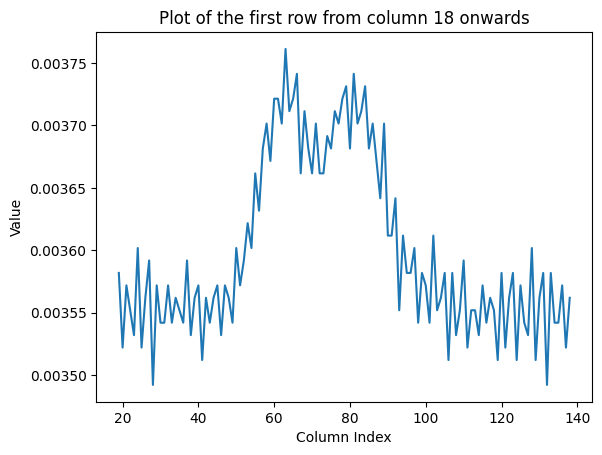

In [6]:
import matplotlib.pyplot as plt

data_to_plot = df_dynamic.iloc[0, 18:]

plt.plot(data_to_plot)

plt.xlabel('Column Index')
plt.ylabel('Value')
plt.title('Plot of the first row from column 18 onwards')

plt.show()


In [7]:
import pandas as pd
import numpy as np

def calculate_displacement(df, window_size):
    displacement_values = []

    for row_number in range(len(df)):
        data_to_plot = pd.to_numeric(df.iloc[row_number, 18:139], errors='coerce')
        smoothed_data = data_to_plot.rolling(window=window_size, center=True).mean()

        max_value = data_to_plot.max() if np.isfinite(data_to_plot.max()) else 0
        first_value = data_to_plot.iloc[0] if np.isfinite(data_to_plot.iloc[0]) else 0
        min_value = data_to_plot.min() if np.isfinite(data_to_plot.min()) else 0
        # Calculate displacement

        max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
        min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0

        displacement_smoothed = max_value_smoothed - min_value_smoothed

        displacement = max_value - min_value
        displacement_values.append(displacement_smoothed)

    # Add the displacement column to the dataframe
    df['displacement'] = displacement_values

    return df

df_with_displacement = calculate_displacement(df, window_size=4)

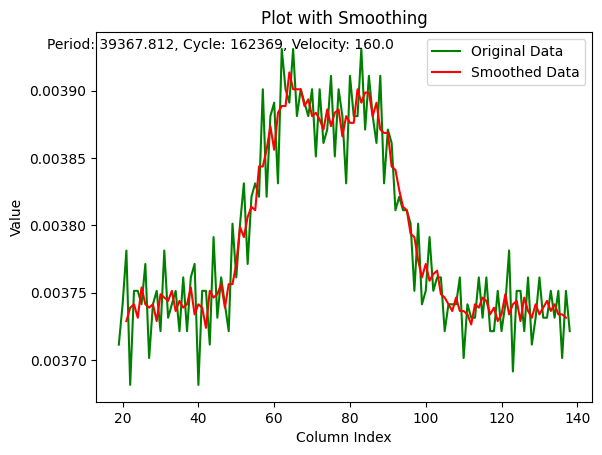

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_with_smoothing(row_number, window_size):
    data_to_plot = pd.to_numeric(df_dynamic.iloc[row_number, 18:], errors='coerce')

    smoothed_data = data_to_plot.rolling(window=window_size, center=True).mean()

    plt.plot(data_to_plot, label='Original Data', color='green')
    plt.plot(smoothed_data, label='Smoothed Data', color='red')

    period = df_dynamic.iloc[row_number, 1]
    cycle_number = df_dynamic.iloc[row_number, 3]
    velocity = df_dynamic.iloc[row_number, 8]

    max_value = data_to_plot.max() if np.isfinite(data_to_plot.max()) else 0
    plt.text(0, max_value, f"Period: {period}, Cycle: {cycle_number}, Velocity: {velocity}", fontsize=10)

    plt.xlabel('Column Index')
    plt.ylabel('Value')
    plt.title('Plot with Smoothing')
    plt.legend()
    plt.show()

plot_with_smoothing(130, 4)

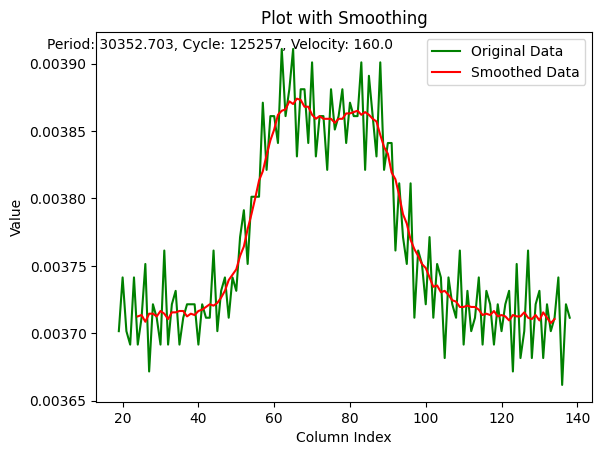

In [9]:
plot_with_smoothing(100, 10)

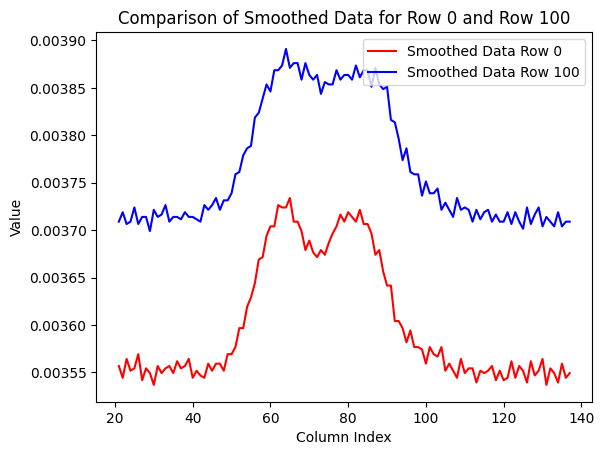

In [10]:
def get_smoothed_data(row_number, window_size):
  data_to_plot = df_dynamic.iloc[row_number, 18:]
  smoothed_data = data_to_plot.rolling(window=window_size, center=True).mean()
  return smoothed_data

smoothed_data_row_0 = get_smoothed_data(0, 4)
smoothed_data_row_100 = get_smoothed_data(100, 4)

plt.plot(smoothed_data_row_0, label='Smoothed Data Row 0', color='red')
plt.plot(smoothed_data_row_100, label='Smoothed Data Row 100', color='blue')

plt.xlabel('Column Index')
plt.ylabel('Value')
plt.title('Comparison of Smoothed Data for Row 0 and Row 100')
plt.legend()
plt.show()


In [11]:
import os
import pandas as pd

def create_and_save_velocity_dataframes(df, output_dir):
    # Ensure the output directory exists
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Group the DataFrame by the 'velocity' column
    grouped_by_velocity = df.groupby('velocity')

    # Loop through each unique velocity and save the corresponding DataFrame
    for velocity, velocity_df in grouped_by_velocity:
        # Define the output file name based on the velocity
        output_file_path = os.path.join(output_dir, f"data_velocity_{int(velocity)}.csv")
        
        # Save the DataFrame for the current velocity
        velocity_df.to_csv(output_file_path, index=False)
        
        print(f"Saved DataFrame for velocity {velocity} to {output_file_path}")

# Example usage
output_directory = "../dataset/velocity_dfs"
create_and_save_velocity_dataframes(df_with_displacement, output_directory)


KeyError: 'velocity'